In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

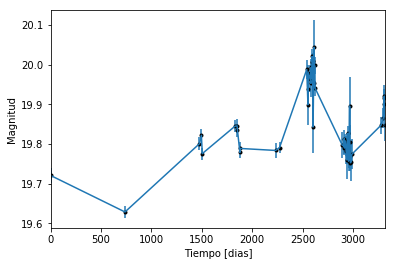

In [2]:
data = np.genfromtxt('LC_22275_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

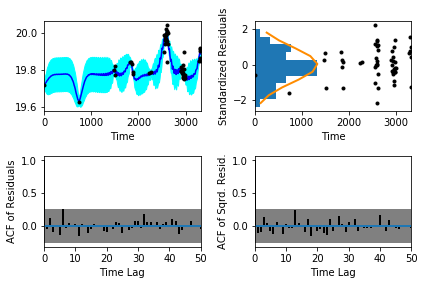

In [5]:
sample.assess_fit()

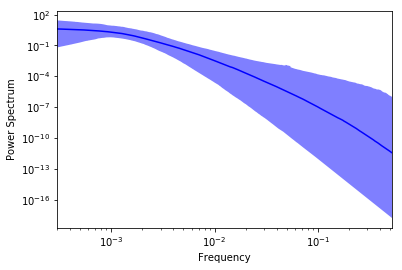

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.070774,'Medida del nivel de ruido')

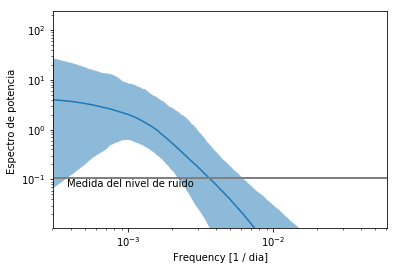

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

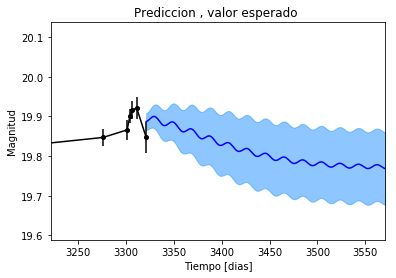

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

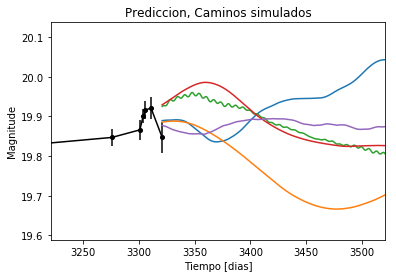

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


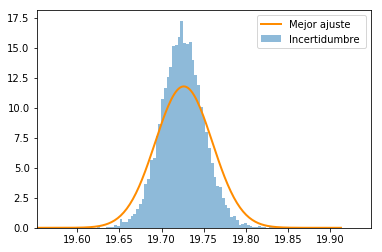

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

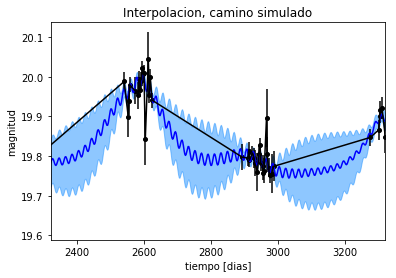

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

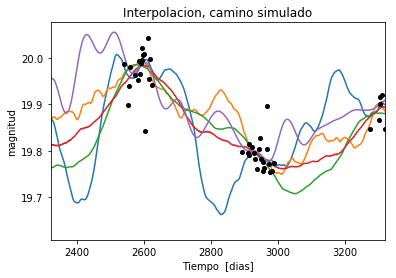

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 694.950198747
Median: 0.00486771513104
Standard deviation: 0.183853123854
68% credibility interval: [ 0.00052428  0.13396614]
95% credibility interval: [  3.30626421e-04   7.41399293e-01]
99% credibility interval: [  3.09997359e-04   9.78237097e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2215.5840133
Median: 0.00134078969113
Standard deviation: 0.0842459199442
68% credibility interval: [ 0.00040502  0.02435235]
95% credibility interval: [ 0.00031808  0.2139612 ]
99% credibility interval: [  3.05827331e-04   6.99944285e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 3001.65679498
Median: 0.0169389399876
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 719.276514815
Median: 127.56528058
Standard deviation: 1.69924977897
68% credibility interval: [ 125.75766835  128.71685589]
95% credibility interval: [ 123.22080743  130.44180814]
99% credibility interval: [ 121.30946841  131.95552825]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 569.573741976
Median: 0.5724113513
Standard deviation: 2.07097062207
68% credibility interval: [ 0.04469999  3.51932363]
95% credibility interval: [ 0.01160596  7.01708396]
99% credibility interval: [  9.62687278e-03   9.64925016e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 476.563204895
Median: 0.148892665449
Standard deviation: 8.97023220752
68% credibility interval: [ 0.00683343  5.59202279]
95% credibility interval: [  4.324

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19744.913761
Median: 1.63516843962e-16
Standard deviation: 1.01413285839e+149
68% credibility interval: [  1.84612532e-65   1.36980354e+71]
95% credibility interval: [  4.51054724e-104   7.17320952e+135]
99% credibility interval: [  6.70952600e-110   4.68303739e+142]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2176.95620959
Median: 19.8011746812
Standard deviation: 0.0497504101826
68% credibility interval: [ 19.75711437  19.8354172 ]
95% credibility interval: [ 19.69436966  19.8880173 ]
99% credibility interval: [ 19.62631035  19.9583418 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 208.918467408
Median: 0.0020589792336
Standard deviation: 0.241426610031
68% credibility interval: [ 0.          0.25931932]
95% credibility interval: [ 0.          0.95075199]
99% credibility interval: [ 0.          0.98650348]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 208.918467408
Median: 0.0020589792336
Standard deviation: 0.241426610031
68% credibility interval: [ 0.          0.25931932]
95% credibility interval: [ 0.          0.95075199]
99% credibility interval: [ 0.          0.98650348]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 393.841616032
Median: 0.0
Standard deviation: 0.000517715668709
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 719.276514815
Median: 127.56528058
Standard deviation: 1.69924977897
68% credibility interval: [ 125.75766835  128.71685589]
95% credibility interval: [ 123.22080743  130.44180814]
99% credibility interval: [ 121.30946841  131.95552825]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1054.29785148
Median: 0.0115346119206
Standard deviation: 0.0140311397366
68% credibility interval: [ 0.00673095  0.02240609]
95% credibility interval: [ 0.0044951   0.04796106]
99% credibility interval: [ 0.00360426  0.08734622]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 923.13494987
Median: 1.04635049183
Standard deviation: 0.174043789224
68% credibility interval: [ 0.89607696  1.23168524]
95% credibility interval: [ 0.76616925  1.44362786]
99% credibility interval: [ 0.7047603   1.61503159]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 869.983182014
Median: 1.59015022425e-05
Standard deviation: 0.0501843243235
68% credibility interval: [  2.79472610e-74   1.94532365e-03]
95% credibility interval: [  3.76411512e-140   5.10610870e-002]
99% credibility interval: [  7.74740474e-149   3.68957718e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 694.950198747
Median: (-0.0305847561909-3.28285061711j)
Standard deviation: 1.90670377385
68% credibility interval: [-0.84173406+0.j         -0.00329416-0.00763979j]
95% credibility interval: [ -4.65834914e+00+0.j          -2.07738707e-03-0.00565856j]
99% credibility interval: [ -6.14644496e+00+0.j          -1.94777085e-03-0.00914174j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2215.5840133
Median: (-0.00842443008733+0.00236966935042j)
Standard deviation: 1.60663128424
68% credibility interval: [-0.15301034+0.41824181j -0.00254480+0.j        ]
95% credibility interval: [-1.34435790+0.j -0.00199853+0.j]
99% credibility interval: [ -4.39787964e+00+4.19904134j  -1.92156979e-03+0.j        ]
Posterior summary for param